In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# ✅ Step 2: Upload Dataset from Local
from google.colab import files
uploaded =files.upload()

Saving Superstore.csv.zip to Superstore.csv (2).zip


In [17]:
# ✅ Step 3: Load the Dataset
# Replace with exact filename after upload
import zipfile
import io

file_name = next(iter(uploaded)) # Get the name of the uploaded file

if file_name.endswith('.zip'):
    with zipfile.ZipFile(io.BytesIO(uploaded[file_name]), 'r') as z:
        # Assuming the CSV file inside the zip has a similar name
        csv_file_name = [f for f in z.namelist() if f.endswith('.csv')][0]
        try:
            with z.open(csv_file_name) as f:
                df = pd.read_csv(f, encoding='utf-8')
        except UnicodeDecodeError:
             with z.open(csv_file_name) as f:
                df = pd.read_csv(f, encoding='latin1') # Try a different encoding if utf-8 fails
else:
    try:
        df = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding='latin1') # Try a different encoding

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [18]:
# ✅ Step 4: Data Overview
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
df.describe()


Shape: (51290, 24)

Data Types:
 Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

Missing Values:
 Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [19]:
# ✅ Step 5: Data Cleaning (if needed)
# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert Date columns if present
if 'Order Date' in df.columns:
    df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
if 'Ship Date' in df.columns:
    df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')


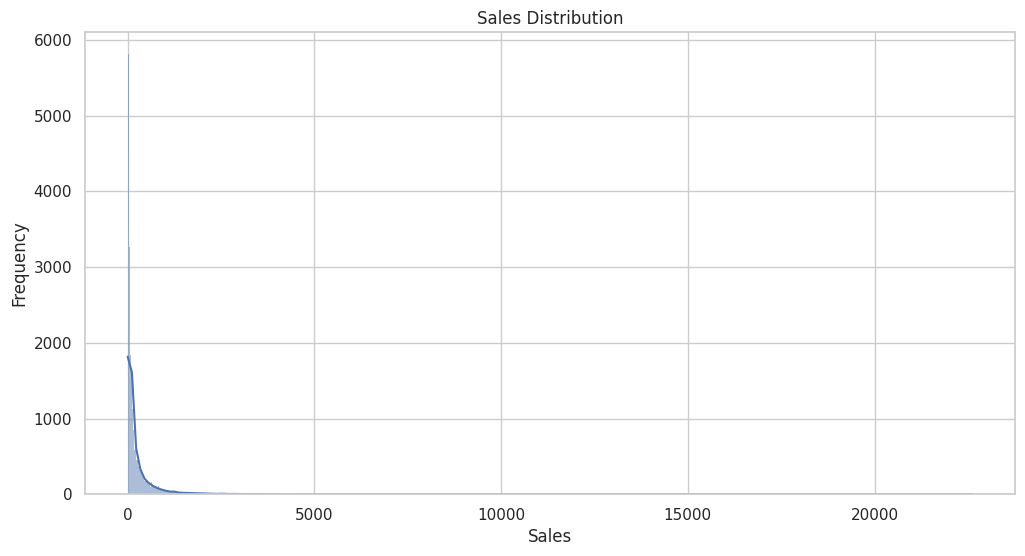

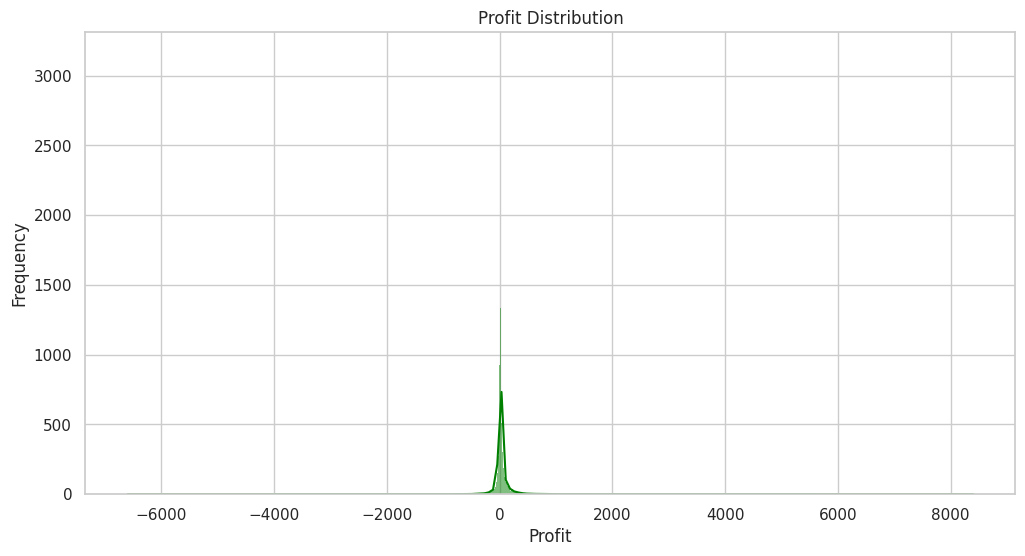

In [20]:
# ✅ Step 6: Univariate Analysis

# Sales distribution
sns.histplot(df['Sales'], kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Profit distribution
sns.histplot(df['Profit'], kde=True, color='green')
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()


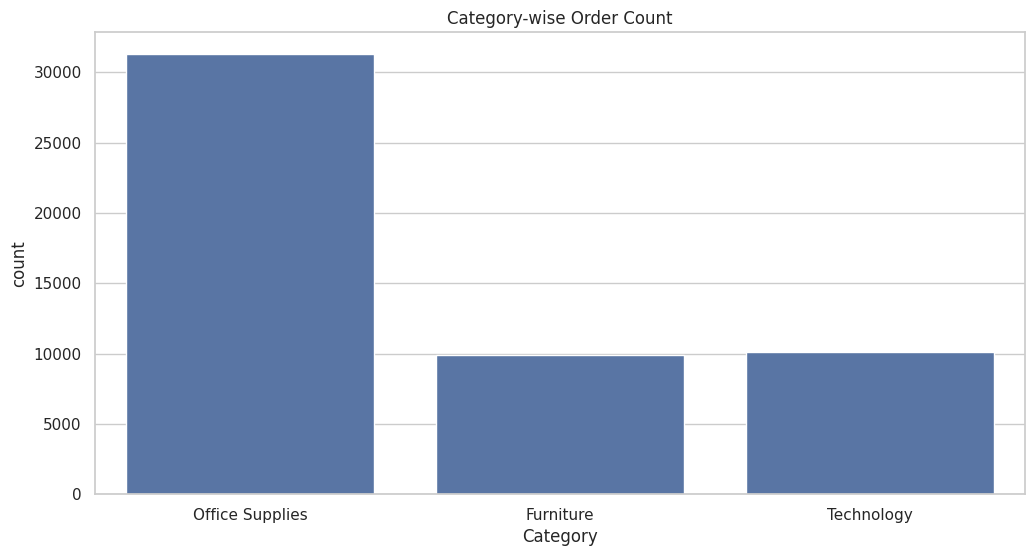

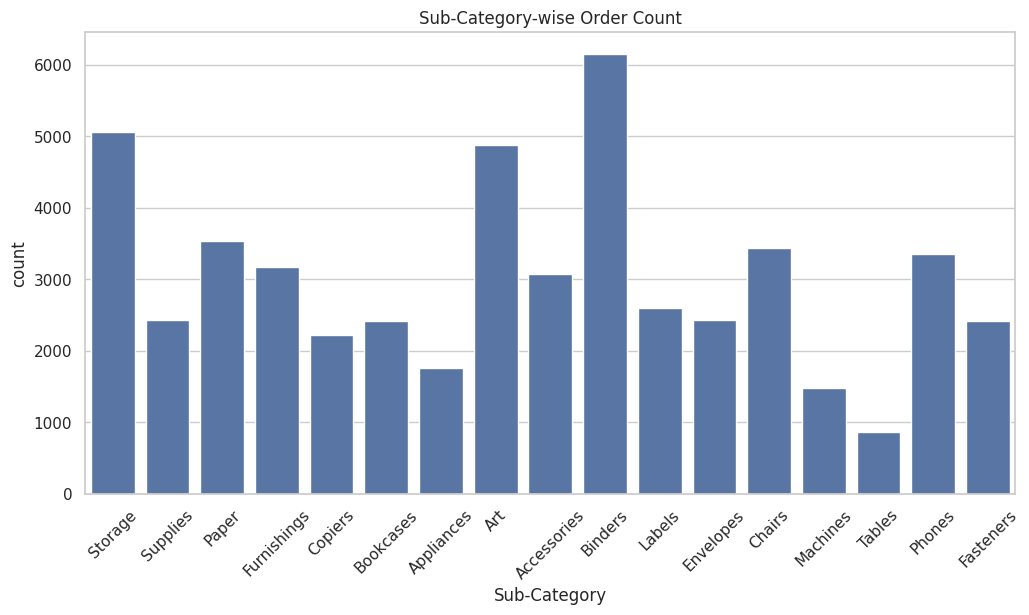

In [21]:
# ✅ Step 7: Categorical Counts

# Category Count
if 'Category' in df.columns:
    sns.countplot(data=df, x='Category')
    plt.title('Category-wise Order Count')
    plt.show()

# Sub-category
if 'Sub-Category' in df.columns:
    plt.xticks(rotation=45)
    sns.countplot(data=df, x='Sub-Category')
    plt.title('Sub-Category-wise Order Count')
    plt.show()


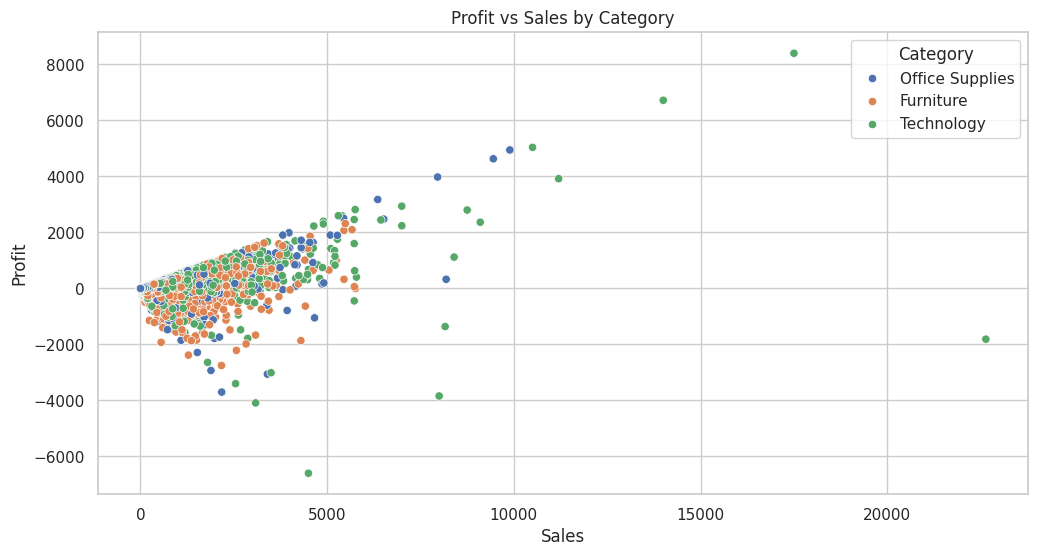

In [22]:
# ✅ Step 8: Profit vs Sales Scatterplot
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category')
plt.title('Profit vs Sales by Category')
plt.show()


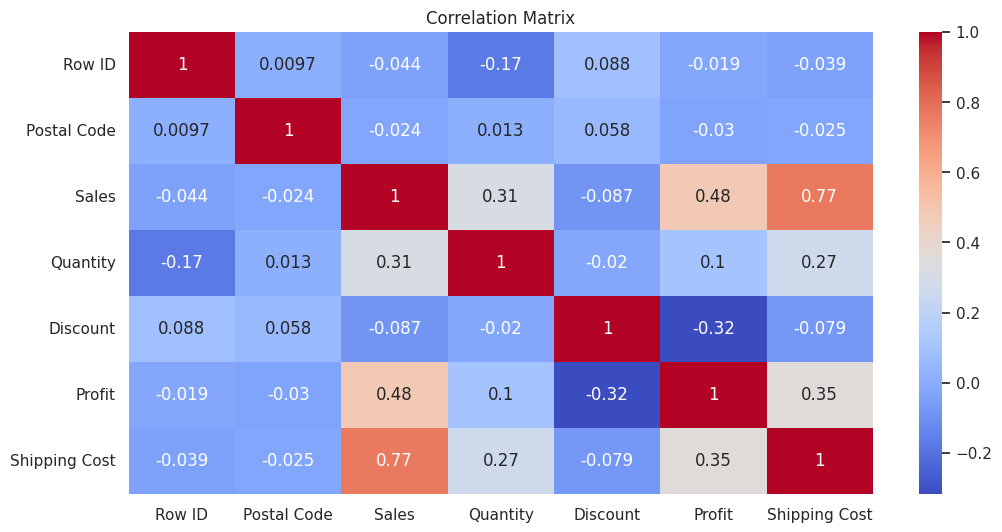

In [23]:
# ✅ Step 9: Correlation Heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


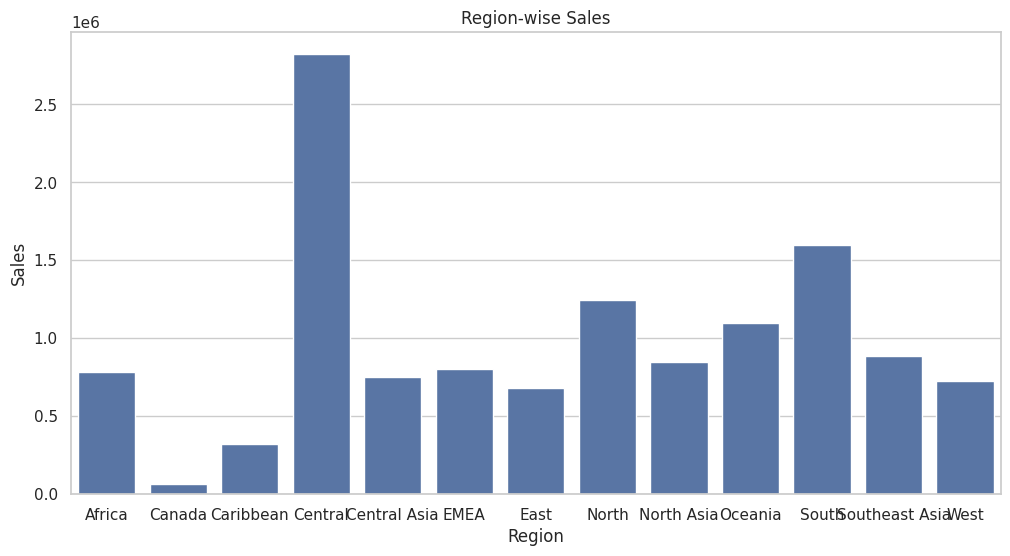

In [24]:
# ✅ Step 10: Region-wise Sales (if available)
if 'Region' in df.columns:
    region_sales = df.groupby('Region')['Sales'].sum().reset_index()
    sns.barplot(data=region_sales, x='Region', y='Sales')
    plt.title('Region-wise Sales')
    plt.show()


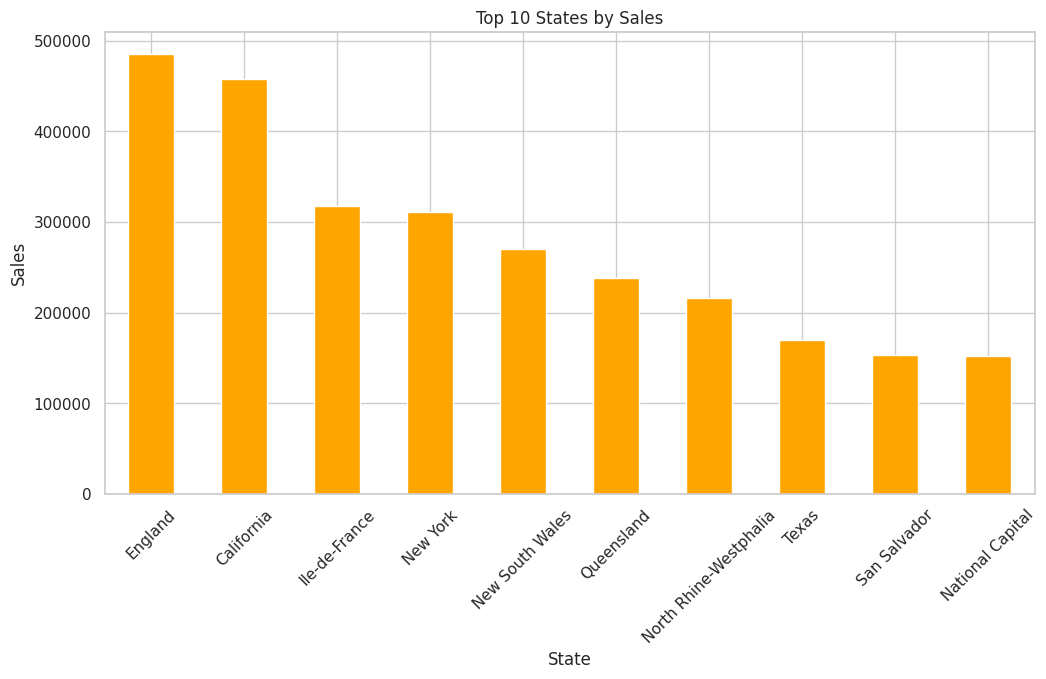

In [25]:
# ✅ Step 11: Top 10 States by Sales
if 'State' in df.columns:
    top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
    top_states.plot(kind='bar', color='orange')
    plt.title('Top 10 States by Sales')
    plt.ylabel('Sales')
    plt.xticks(rotation=45)
    plt.show()


In [26]:
print("Total Sales: ₹", round(df['Sales'].sum(), 2))
print("Total Profit: ₹", round(df['Profit'].sum(), 2))

if 'Category' in df.columns:
    print("Most Profitable Category:", df.groupby('Category')['Profit'].sum().idxmax())


Total Sales: ₹ 12642501.91
Total Profit: ₹ 1467457.29
Most Profitable Category: Technology
